In [2]:
import os
import sys


sys.path.append("..\\deep_learning_from_scratch")  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from project1.simple_convnet import SimpleConvNet   #심플한 컨볼루션 신경망 클래스

import cv2 as cv
from matplotlib.image import imread #이미지를 읽기 위한 함수
from project1.layers import Convolution   #컨볼루션 레이어 구현을 위한 클래스


def box_off():
    ax=plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_axis_off()  

In [3]:
def filter_show(filters, nx=8, margin=3, scale=10):
    """
    :param filters: 시각화할 컨볼루션 필터들이 저장된 배열. filters.shape는 (FN, C, FH, FW) 형식이어야 하며, 여기서 FN은 필터 개수, C는 채널 수 (예를 들어 컬러 이미지의 경우 3), FH와 FW는 각각 필터의 높이와 너비를 의미합니다.
    :param nx: 한 행에 배치할 필터의 개수입니다. 기본값은 8
    :param margin: 필터 사이의 여백 크기입니다.
    :param scale:  각 필터의 크기를 조정하는 인자입니다.
    :return: 
    """

    """
    c.f. https://gist.github.com/aidiary/07d530d5e08011832b12#file-draw_weight-py
    """
    FN, C, FH, FW = filters.shape   #FN은 필터 개수, C는 채널 수 (예를 들어 컬러 이미지의 경우 3), FH와 FW는 각각 필터의 높이와 너비
    ny = int(np.ceil(FN / nx))  #필터를 격자 형태로 배치하기 위해, 세로 방향(ny)의 행 수를 계산합니다. FN을 nx로 나누고 올림하여 행 개수를 정합니다

    fig = plt.figure()
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    """
    plt.figure()로 새로운 그림을 생성합니다.
    fig.subplots_adjust(...)는 서브플롯 간의 간격을 조정합니다. hspace는 수평 간격, wspace는 수직 간격을 의미합니다.
    """

    for i in range(FN):
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[])
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_axis_off()
        """
        for i in range(FN): 모든 필터에 대해 반복합니다.
        ax = fig.add_subplot(ny, nx, i+1, xticks=[], yticks=[]): ny x nx 그리드의 각 셀에 서브플롯을 추가합니다. xticks, yticks는 각 축의 눈금을 표시하지 않도록 설정합니다.
        ax.imshow(filters[i, 0], cmap=plt.cm.gray_r, interpolation='nearest'): filters[i, 0]에서 첫 번째 채널의 필터를 이미지로 표시합니다. 그레이스케일 색맵을 사용하고, 보간법은 'nearest'로 설정하여 픽셀의 경계를 뚜렷하게 만듭니다.
        ax.set_axis_off(): 축을 숨깁니다.
        """

dict_keys(['W1', 'b1', 'W2', 'b2', 'W3', 'b3'])
{'W1': array([[[[ 1.47152070e-02,  6.18032081e-03, -1.77121803e-03,
           1.88534310e-02, -4.10008308e-03],
         [-1.25570208e-02, -3.55291818e-03, -1.30314846e-02,
          -6.14466877e-03, -7.31785650e-03],
         [ 4.01370544e-03, -2.07356358e-03, -7.55925105e-03,
          -7.79170104e-03, -8.13296083e-03],
         [ 1.15267962e-02, -2.67575594e-03,  1.17128468e-02,
           1.24586798e-02, -6.30487600e-03],
         [-6.62765041e-03, -6.31257636e-03,  7.11773382e-03,
          -1.68011347e-02,  2.49269395e-04]]],


       [[[ 1.23623763e-02,  5.83700968e-03, -2.54038146e-03,
           9.48620830e-03, -1.57981245e-03],
         [-2.01101976e-03,  4.03431526e-03, -1.19830091e-03,
           9.57832536e-03,  2.53902880e-03],
         [ 7.97677168e-03,  7.49914526e-03,  2.08771491e-02,
           1.21996120e-02,  1.48782809e-03],
         [ 2.13530090e-03, -1.77432560e-03, -1.83004116e-02,
           1.60359035e-02, -7.07

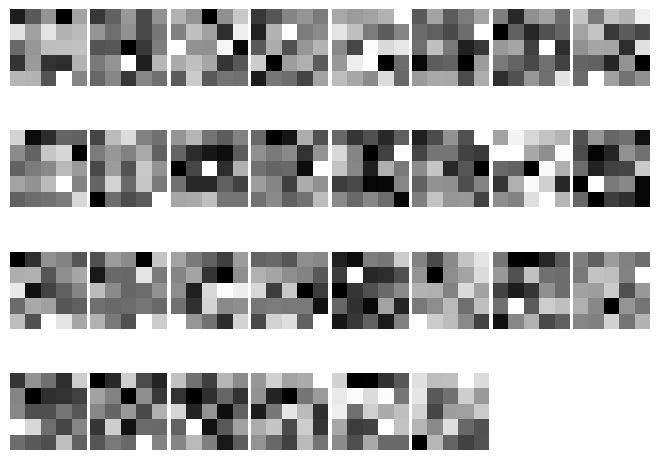

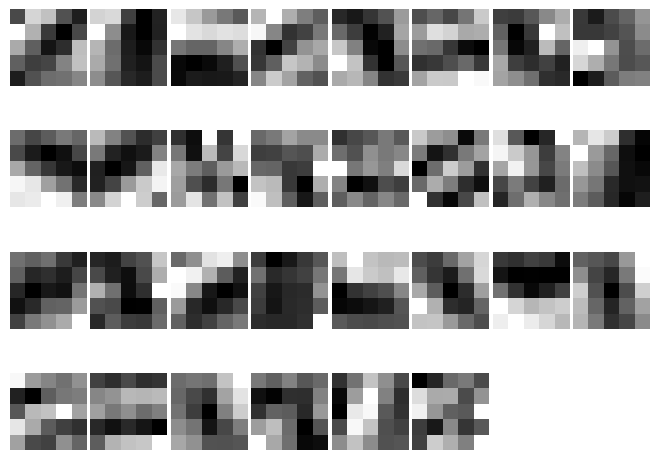

In [4]:
network = SimpleConvNet()
# 무작위(랜덤) 초기화 후의 가중치
filter_show(network.params['W1'])
print(network.params.keys())
print(network.params)
# 학습된 가중치
network.load_params("params.pkl")
filter_show(network.params['W1'])

(-0.5, 511.5, 511.5, -0.5)

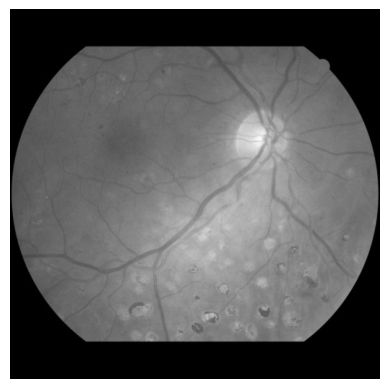

In [5]:
img = cv.imread('..\\project1\\G1020\\Images_Square\\image_0.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

plt.imshow(img, cmap='gray')
plt.axis('off')


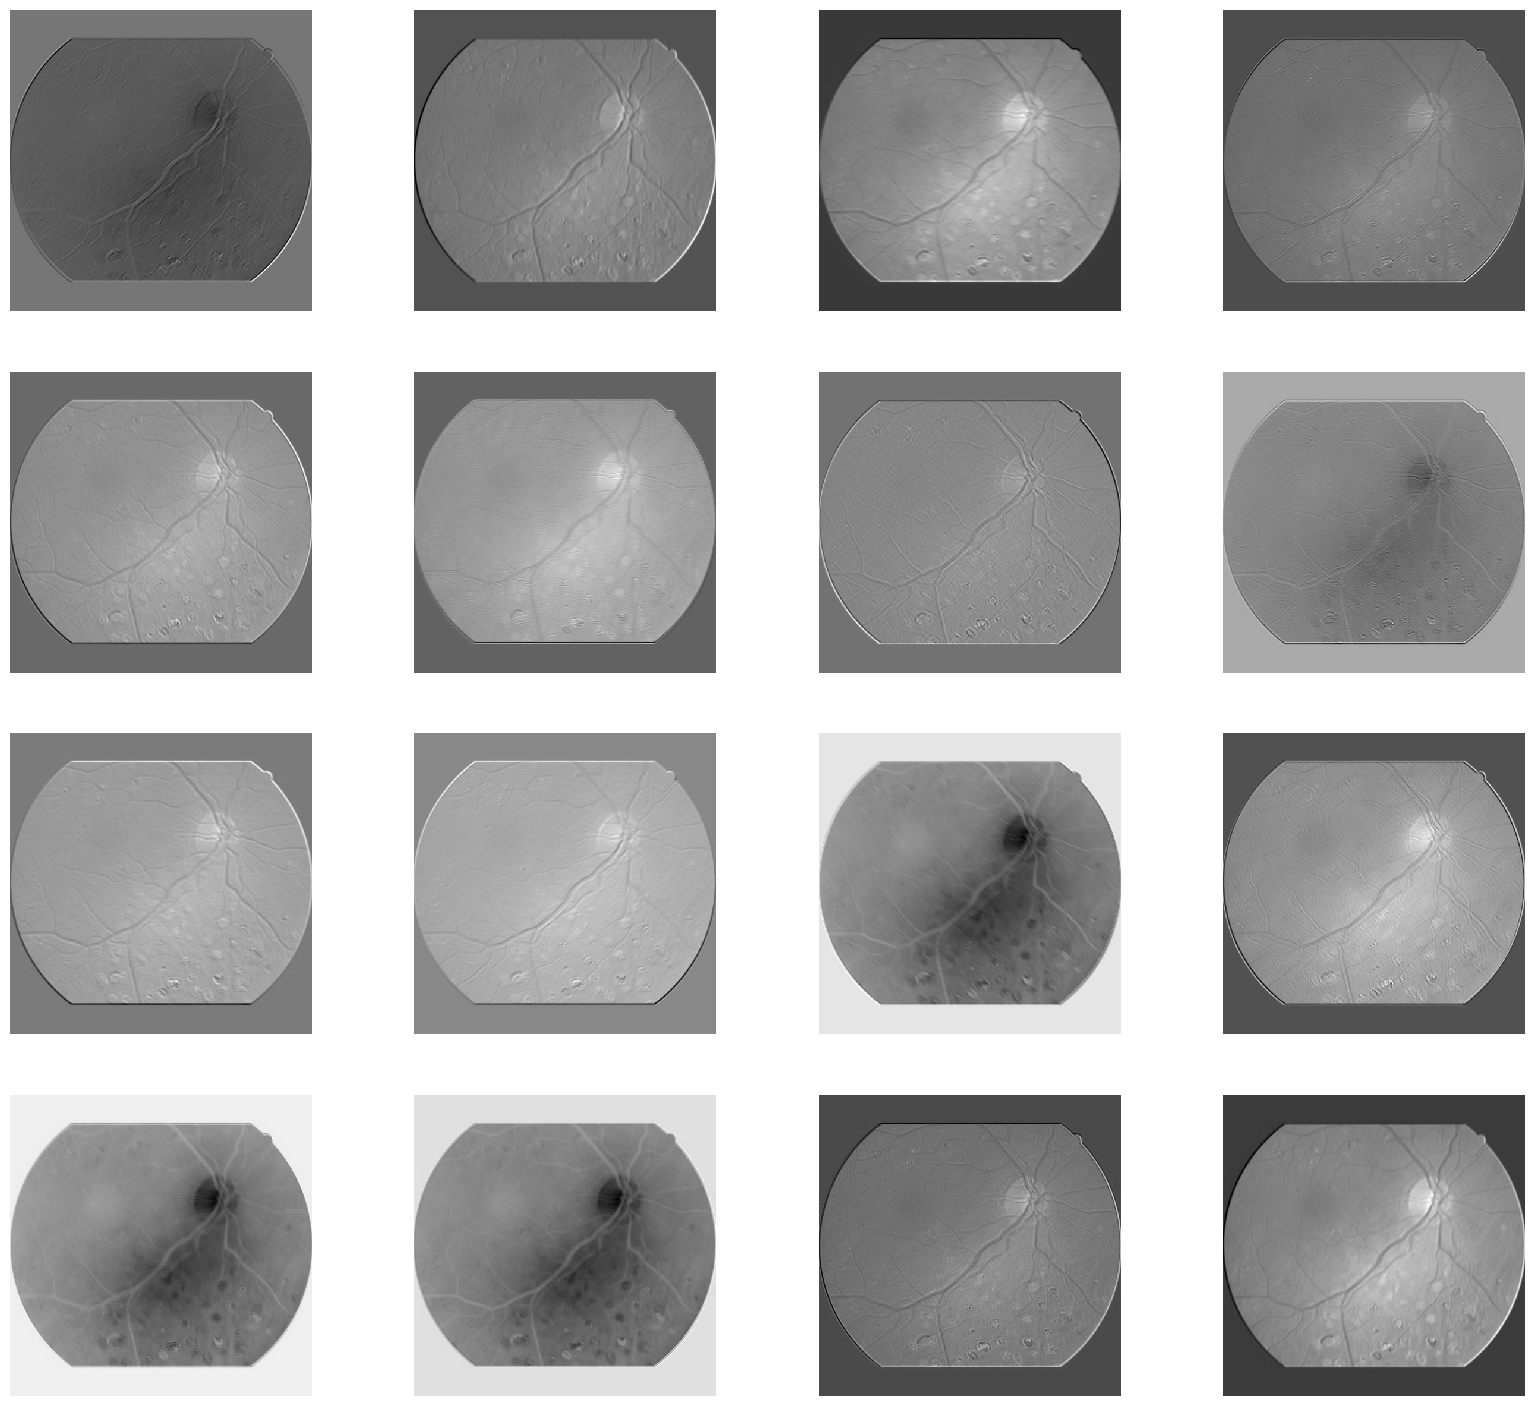

In [6]:

if img.ndim < 4:
    img = img.reshape(1, 1, img.shape[0], img.shape[1])


fig = plt.figure(figsize=(20,18))

w_idx = 1
out_list = []
for i in range(16):
    w = network.params['W1'][i]
    b = 0  # network.params['b1'][i]
    """
    w_idx = 1: 필터 인덱스.
    out_list = []: 필터 출력 결과를 저장할 리스트를 초기화합니다.
    network.params['W1'][i]: 첫 번째 레이어의 i번째 필터(W1)를 가져옵니다. 여기서 W1은 첫 번째 컨볼루션 레이어의 가중치입니다. 이 필터는 4D 텐서로 (필터 개수, 채널 수, 필터 높이, 필터 너비) 형식일 것입니다.
    b = 0: 첫 번째 레이어의 편향을 가져오는 부분이지만, 이 코드에서는 편향값 b를 0으로 설정하고 있습니다.
    """
    w = w.reshape(1, *w.shape)
    #b = b.reshape(1, *b.shape)
    conv_layer = Convolution(w, b)
    out = conv_layer.forward(img)   #여기서 문제
    out = out.reshape(out.shape[2], out.shape[3])
    out_list.append(out)
    """
    w.reshape(1, *w.shape): 필터를 (1, 채널 수, 높이, 너비) 형식으로 변환합니다.
    conv_layer = Convolution(w, b): Convolution 클래스의 인스턴스를 생성하여 필터(w)와 편향(b)을 사용하여 컨볼루션 연산을 정의합니다.
    out = conv_layer.forward(img): 이미지를 필터와 함께 컨볼루션 연산을 수행하여 출력을 얻습니다. 이 출력은 (1, 채널 수, 높이, 너비) 형식입니다.
    out = out.reshape(out.shape[2], out.shape[3]): 출력의 높이와 너비를 평평하게 만들어서 2D로 변환합니다. 이를 통해 필터에 의해 생성된 각 특성 맵을 시각화할 수 있게 됩니다.
    """
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[])
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_axis_off()
    """
    ax = fig.add_subplot(4, 4, i+1, xticks=[], yticks=[]): 4x4 격자(총 16개의 서브플롯)를 만들어 각 필터의 출력을 표시할 공간을 생성합니다. xticks, yticks를 없애서 축을 표시하지 않습니다.
    ax.imshow(out, cmap=plt.cm.gray_r, interpolation='nearest'): out을 그레이스케일로 이미지화합니다. interpolation='nearest'는 픽셀의 경계를 뚜렷하게 표시하는 방식입니다.
    ax.set_axis_off(): 축을 숨깁니다.
    """

"\nfig.add_subplot(1,2,2): 두 번째 서브플롯을 생성합니다.\nnetwork.params['W1'][2,0]: 세 번째 필터를 가져옵니다. 첫 번째 필터가 network.params['W1'][0,0]라면, 여기서는 두 번째 필터와 세 번째 필터를 비교하고 있습니다.\n이 필터도 마찬가지로 그레이스케일로 시각화됩니다.\n"

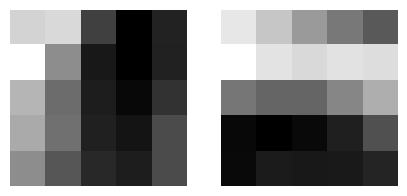

In [7]:
fig = plt.figure(figsize=(5,2.5))
"""
figsize=(5,2.5)로 그림의 크기를 설정합니다. 이 경우 가로가 5인치, 세로가 2.5인치인 그림이 생성됩니다
"""
# 첫 번째 필터 시각화
ax = fig.add_subplot(1,2,1)
ax.imshow(network.params['W1'][1,0], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 
"""
fig.add_subplot(1,2,1): 1행 2열의 서브플롯 중 첫 번째 서브플롯을 생성합니다. 즉, 두 개의 이미지를 나란히 보여주는 구조입니다.
network.params['W1'][1,0]: 첫 번째 필터(W1)의 두 번째 필터를 가져옵니다. 이 필터는 3D 텐서로 되어 있을 가능성이 높으므로, 여기서는 채널이 0인 경우를 선택한 것 같습니다.
ax.imshow(...): 필터를 그레이스케일로 표시하고, interpolation='nearest'를 설정하여 픽셀의 경계가 뚜렷하게 보이게 합니다.
ax.set_axis_off(): 축을 숨깁니다.
"""
# 두 번째 필터 시각화
ax = fig.add_subplot(1,2,2)
ax.imshow(network.params['W1'][2,0], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 
"""
fig.add_subplot(1,2,2): 두 번째 서브플롯을 생성합니다.
network.params['W1'][2,0]: 세 번째 필터를 가져옵니다. 첫 번째 필터가 network.params['W1'][0,0]라면, 여기서는 두 번째 필터와 세 번째 필터를 비교하고 있습니다.
이 필터도 마찬가지로 그레이스케일로 시각화됩니다.
"""

'\nfig.add_subplot(1,2,2): 두 번째 서브플롯을 추가합니다.\nout_list[2]: out_list에서 세 번째 출력을 선택하여 시각화합니다.\nax.imshow(...): 동일하게 그레이스케일로 출력을 시각화하고, 축을 숨깁니다.\n'

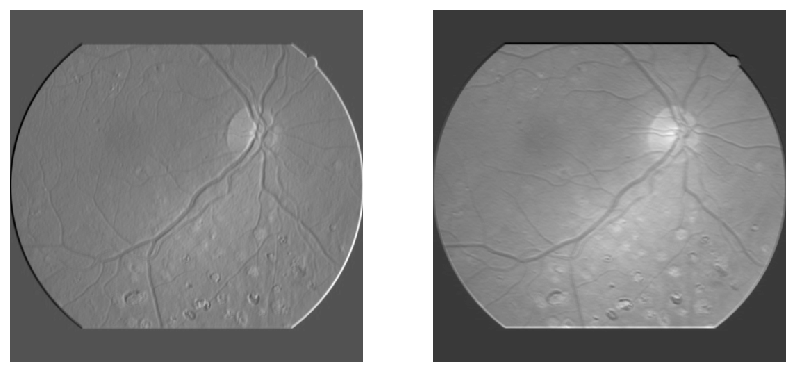

In [8]:
fig = plt.figure(figsize=(10,10))
"""
figsize=(10,8)은 출력할 그림의 크기를 설정하는 부분입니다. 이 경우 가로 10인치, 세로 8인치의 크기로 설정됩니다.
"""
ax = fig.add_subplot(1,2,1)
ax.imshow(out_list[1], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 
"""
fig.add_subplot(1,2,1): 1행 2열의 서브플롯에서 첫 번째 서브플롯을 추가합니다.
out_list[1]: out_list에서 두 번째 출력을 선택하여 시각화합니다.
ax.imshow(...): 그레이스케일로 출력 이미지를 시각화하며, interpolation='nearest'로 설정하여 픽셀 경계가 뚜렷하게 보이도록 합니다.
ax.set_axis_off(): 축을 숨깁니다.
"""
ax = fig.add_subplot(1,2,2)
ax.imshow(out_list[2], cmap=plt.cm.gray_r, interpolation='nearest')
ax.set_axis_off() 
"""
fig.add_subplot(1,2,2): 두 번째 서브플롯을 추가합니다.
out_list[2]: out_list에서 세 번째 출력을 선택하여 시각화합니다.
ax.imshow(...): 동일하게 그레이스케일로 출력을 시각화하고, 축을 숨깁니다.
"""